# Introduction

Heat Equation in 2D by solving second order PDE problem using finite differences. 



# Problem 

Consider intially a source of heat appearing in an initially cold system. This could be as simple as turning on a heater in a roomm or opening a window on a cold winter's day. If we assume that we have $u(x,y,z,t)$ as the temperature at point $x$, $y$, $z$, at time $t$, the heat equation takes the form of $\frac{\partial{u}}{\partial{t}} = \alpha\nabla^{2}u $, where $\alpha$ is the thermal diffusivity, which is a measure of how sensitive temperature changes are to the temperature profile. 

# The One-Dimensional Case 

The heat equation in 1-D takes the form:

$$ \frac{\partial{u}}{\partial{t}} = \alpha \frac{\partial^{2}u}{\partial x^{2}} $$

Using the finite difference method one can get the following form:

$$ \frac{u_{j}^{n+1} - u_{j}^{n}}{\Delta t} = \alpha \frac{u_{j+1}^{n} - 2u_{j}^{n} + u_{j-1}^{n}}{\Delta x^{2}}  $$



# Approach to solving Heat Equation in 1D:

i) Rewriting the equation as $$ \frac{u_{j}^{n+1} - u_{j}^{n}}{\Delta t} = \alpha (-\frac{u_{j}^{n} - u_{j-1}^{n}}{\Delta x^{2}} +\frac{u_{j+1}^{n} - u_{j}^{n}}{\Delta x^{2}})$$

ii) create for loop in space array to get take the space coordinates with dx over the length, x_max and 

get dx/dt using the forward time centered space. [This is basically the gradient] we use to move forwards.

iii) get the temperature change by multiplting dt with the gradient,dT/dt from previous step and add this to the current temperature,T.

iv) create a loop in time array, to update temperature,T at each time point as we move along.

v) Initial condition, temperature at x_max/2 is 20 .

vi) Boundary condition, temperature at x=0 is 0 and  temperature at x=x_max is 0.


Disclaimer: units are not considered in the scheme. Units can vary. We focus solely on the finite difference scheme.


# Coding the situation



In [22]:
#Necessary imports
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image 
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

In [23]:
# Defining the program
def heat_FTCS(dt,dx,t_max,x_max,a,T_start,T_end,T0):
    """Function calculates Forward Time Centered Scheme to solve Partial Differential Equation 
    of Heat Diffusion of a system in space. The system has intial and boundary conditions. 
    
    Args:
        dt: time step
        dx: space step
        t_max: length of time fo which we will observe the system
        x_max: length of suppose a rod in which we will observe the heat flow
        T_start: the initial boundary condition at the start
        T_end: the final boundary condtion at the end
        a: is thermal diffusivity
    Returns:
        f: Distribution function being solved as a function of time
        x: The position grid (for information)
        t: The time grid (for information)
    """
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    # number of t points
    nt = len(t)
    #number of x points
    xn = len(x)
    #create a 1 dimensional array containing zeros with size xn to hold values of T, temperature
    T = np.zeros(xn)
    #create a 1 dimensional empty array with size xn to hold values of dT/dt 
    temp_delta = np.empty(xn)
    # set boundary conditions
    temp_delta[0] = T_start 
    temp_delta[xn-1] = T_end
    #loop through time to update the values of 
    for i in range(1,nt):
        #loop through space
        for j in range(1,xn-1):
            temp_delta[j] = a*(-(T[j]-T[j-1])/(dx**2))+((T[j+1]-T[j])/(dx**2))
        #set initial condition
        T[int((xn)/2)] = T0 
       
       
        # update temperature
        T = T + temp_delta*dt
            
    return(T,x,t) 





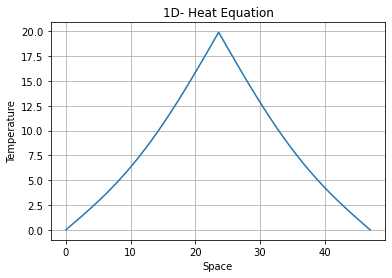

In [24]:
y= heat_FTCS(0.01,0.2,100,47,1,0,0,20)[0] # getting the temperature points
x= heat_FTCS(0.01,0.2,100,47,1,0,0,20)[1] # getting the space points 

#Plotting 
plt.plot(x,y)
plt.xlabel('Space')
plt.ylabel('Temperature')
plt.title('1D- Heat Equation')
plt.grid('on')

# Change source dx=0.1:
stabilty criterion gives 2 which violates $$\frac{2a\Delta t}{\Delta x^{2}} <= 1$$

Solution becomes divergent and thus unstable.

<ipython-input-23-98eba2054339>:36: RuntimeWarning: overflow encountered in double_scalars
  temp_delta[j] = a*(-(T[j]-T[j-1])/(dx**2))+((T[j+1]-T[j])/(dx**2))
<ipython-input-23-98eba2054339>:42: RuntimeWarning: invalid value encountered in add
  T = T + temp_delta*dt


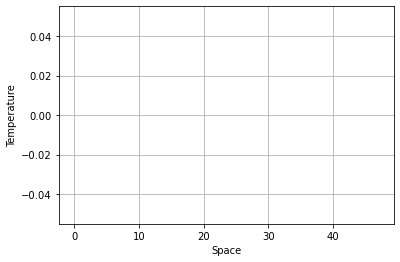

In [25]:
# change dx from 0.2 to 0.1
y= heat_FTCS(0.01,0.1,100,47,1,0,0,20)[0] # getting the temperature points
x= heat_FTCS(0.01,0.1,100,47,1,0,0,20)[1] # getting the space points 

#Plotting 
plt.plot(x,y)
plt.xlabel('Space')
plt.ylabel('Temperature')
plt.grid('on')

# Temperature not constant in time:
It means that the source will only be present initially, and heat will get distributed as time passes, temperature cannot go up to 20. 

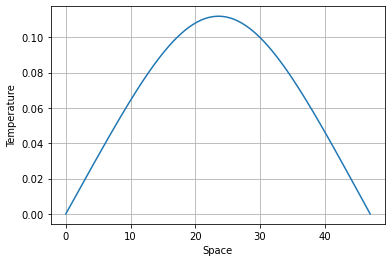

In [26]:
def heat_FTCS(dt,dx,t_max,x_max,a,T_start,T_end,T0):
   
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    nt = len(t)
    xn = len(x)
    T = np.zeros(xn)
    temp_delta = np.empty(xn)
    T[int((xn)/2)] = T0 
    for i in range(1,nt):
        for j in range(1,xn-1):
            temp_delta[j] = a*(-(T[j]-T[j-1])/(dx**2))+((T[j+1]-T[j])/(dx**2))
        
        temp_delta[0] = T_start 
        temp_delta[xn-1] = T_end
        T = T + temp_delta*dt
    return(T,x,t) 

y= heat_FTCS(0.01,0.2,100,47,1,0,0,20)[0] # getting the temperature points
x= heat_FTCS(0.01,0.2,100,47,1,0,0,20)[1] # getting the space points 

#Plotting 
plt.plot(x,y)
plt.xlabel('Space')
plt.ylabel('Temperature')
plt.grid('on')

# Modifying the previous function to add different boundary and initial conditions

In [27]:
def heat_FTCS_mod(dt,dx,t_max,x_max,a,T_start,T_end,T0):
    """Function calculates Forward Time Centered Scheme to solve Partial Differential Equation 
    of Heat Diffusion of a system in space. The system has intial and boundary conditions. 
    
    Args:
        dt: time step
        dx: space step
        t_max: length of time fo which we will observe the system
        x_max: length of suppose a rod in which we will observe the heat flow
        T_start: the initial boundary condition at the start
        T_end: the final boundary condtion at the end
        a: is thermal diffusivity
    Returns:
        f: Distribution function being solved as a function of time
        x: The position grid (for information)
        t: The time grid (for information)
    """
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    # number of t points
    nt = len(t)
    #number of x points
    xn = len(x)
    #create a 1 dimensional array containing zeros with size xn to hold values of T, temperature
    T = np.zeros(xn)
    #create a 1 dimensional empty array with size xn to hold values of dT/dt 
    temp_delta = np.empty(xn)
    #initial condition-temperature
    T[1:xn-1] = T0
    
    # loop through time
    for i in range(1,nt):
        #loop through space
        for j in range(1,xn-1):
            temp_delta[j] = a*(-(T[j]-T[j-1])/(dx**2))+((T[j+1]-T[j])/(dx**2))
            
        #boundary conditions:
#initial:the x - (x-1) at the initial boundary condition means taking our 
#first point,0 and subtracting it from the boundary,T_start before it
        temp_delta[0] = a*(-(T[0]-T_start)/(dx**2))+((T[1]-T[0])/(dx**2))
        
#final: the (x+1) - (x) at the final boundary condition means taking our 
#last point,xn-1 and subtracting it from the boundary,T_end after it
        temp_delta[xn-1] = a*(-(T[xn-1]-T[xn-2])/(dx**2))+((T_end-T[xn-1])/(dx**2))
        # updating temperature points
        T = T + temp_delta*dt
            
    return(T,x,t) 


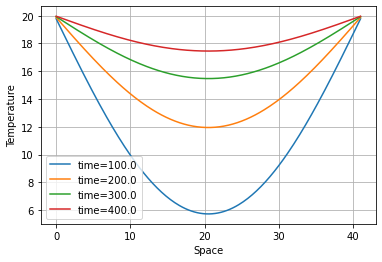

In [10]:
# observing the heat flow in the system for different temperatures
t_range=[100,200,300,400]

#plotting inside a loop
for t in t_range:
    y = heat_FTCS_mod(0.01,0.2,t,41,1,20,20,0)[0]
    x = heat_FTCS_mod(0.01,0.2,t,41,1,20,20,0)[1]

    plt.plot(x,y,label='time={0:.1f}'.format(t))
    plt.xlabel('Space')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid('on')

# Observation and Analysis:
From the above diagram, it can be see that as time is passing by, the heat tends flow from hotter( boundaries) to colder (every other part of the system) and come to equilirium. We can see the temperature tending towards 20 as time passes by. 

We have the stabilty criterion:

$$\frac{2a\Delta t}{\Delta x^{2}} <= 1$$
In our case, intially, the stability is at 0.5 with x=0.2, t=0.01 and a = 1.


# Changing diffusivity constant:

As can be seen in the code below,
increaing diffusivity constant upto 4 althought should give better values if dx and dt are kept constant, python cannot calculate it as it is to large for it to calculate. Decreaing a does give less accurate results as is expected from the stability criterion.
Changing a to 4 with  x=0.2, t=0.01 , to get stabilty 1 apparently does not work in numpy. @_@

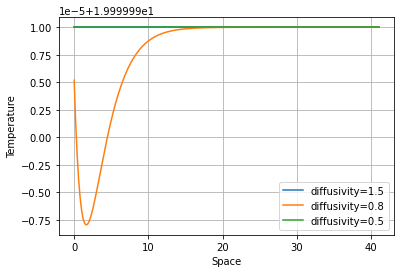

In [11]:
# observing the heat flow in the system for different diffusivity
a0=[1.5,0.8,0.5]

#plotting inside a loop
for a in a0:
    
    y = heat_FTCS_mod(0.01,0.2,100,41,a,20,20,0)[0]
    x = heat_FTCS_mod(0.01,0.2,100,41,a,20,20,0)[1]

    plt.plot(x,y,label='diffusivity={0:.1f}'.format(a))
    plt.xlabel('Space')
    plt.ylabel('Temperature')
    plt.legend()
    plt.grid('on')

# The Two-Dimensional Case

 two-dimensional case of the heat diffusion problem. Our equation now takes the form: 

$$ \frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^{2}u}{\partial x^{2}} + \frac{\partial^{2} u}{\partial y^{2}} \right) $$

 function $u_{j,k}^{n}$, where $n$ is the time index but now $j$ __and__ $k$ are space indices. We can now expand the two second order differentials such that: 

$$ \frac{u_{j,k}^{n+1} - u_{j,k}^{n}}{\Delta t} = \alpha \left( \frac{u_{j+1,k}^{n} - 2u_{j,k}^{n} + u_{j-1,k}^{n}}{\Delta x^{2}} + \frac{u_{j,k+1}^{n} - 2u_{j,k}^{n} + u_{j,k-1}^{n}}{\Delta x^{2}} \right) $$

Note that we have assumed the same spatial grid in both the $x$ and $y$ dimensions. Of course it is possible to have different grid spacing but this will just complicate matters. Again for this PDE we are going to initially deal with a __constant__ source in the middle of our distribution. Or rather given $2p+1$ points in both the $x$ and $y$-dimensions spaced at intervals $\Delta x$, we set a point roughly in the middle of our system $(p)$ to be 20 at __all times__ (e.g. $u_{p,p}^{n} = 20$ for all $n$). We also set the boundaries of the system to be zero ($u_{1,k}^{n}, u_{(2p+1),k}^{n}, u_{j,1}^{n}, u_{j,(2p+1)}^{n} = 0$, for all $j, k, n$). 

# Approach Taken for 2D-Diffusion


In the 1D case, we only considered space in x- dimension. Here, we will consider space in both x and y direction. For simplicity, we will keep the step size and length of both the dimensions same.
 
i) First, create for loop in 2d-space array to get take the space coordinates with dx over the length, x_max and dy over the length, y_max. Rememberm dx=dy and x_max=y_max.

ii)fill up the first array in the 2d array by keeping the indexing of x constant and similarly fill up the other array by keeping y indexing constant. Adding the two individiual arrays gives a 2d array in x and y.(Temperature in x and y)

iii) loop throught time to update the values of T,temperature in each loop.


iv) Initial conditions, temperature are x_max/2=20 , y_max/2 =20 .

v) Boundary condition, temperature at x=0 is 0,y=0 is 0  and temperature at x=x_max is 0, y=y_max is 0

Disclaimer: units are not considered in the scheme. Units can vary. We focus solely on the finite difference scheme.

 # Coding 2D Case



In [13]:
#Defining the program
def heat_FCTS_2D(dt,dx,t_max,x_max,a,T_start,T_end,T0):
    """Function calculates Forward Time Centered Scheme to solve Partial Differential Equation 
    of Heat Diffusion of a system in space, x and y. The system has intial and boundary conditions. 
    
    Args:
        dt: time step
        dx: space step
        t_max: length of time fo which we will observe the system
        x_max: length of suppose a rod in which we will observe the heat flow
        T_0 = initial condition
        T_start: the initial boundary condition at the start
        T_end: the final boundary condtion at the end
        a: is thermal diffusivity
    Returns:
        f: Distribution function being solved as a function of time
        x: The position grid (for information)
        t: The time grid (for information)
    """
    #we have considered x = y 
    
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    nt = len(t)
    #we have considered xn = yn    
    xn = len(x)
    m =xn/2  # source at the middle of space
    T = np.zeros((xn,xn))  #xn =yn
    
    for i in range(1, nt-1):
        for j in range(1, xn-1):
            T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
        # initial temperature at x-boundary and y-boundary 
        T[0,0] = T_start
        #final temperature at x-boundary and y-boundary
        T[xn-1,xn-1] = T_end
        #Temperature source as initial condition in the middle of the system
        T[int(m),int(m)] = T0
          
        
        
    return(T,x)

In [14]:
#temp at boundaries is 20
#temp initially is 0
f,x = heat_FCTS_2D(0.01,0.2,100,41,1,0,0,20)
                  #dt,dx,t_max,x_max,a,T_start,T_end,T0

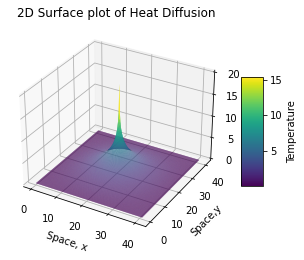

In [15]:
#Plotting using matplotlib's documentation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X,Y=np.meshgrid(x,x)
heat=ax.plot_surface(X, Y, f,cmap='viridis',rstride=1,cstride=1)
fig.colorbar(heat, shrink=0.5, aspect=5, label='Temperature')
ax.set_xlabel("Space, x")
ax.set_ylabel("Space,y")
ax.set_title("2D Surface plot of Heat Diffusion")
plt.show()



# Making source point no longer make your source point constant:
The intuition made in the 1D model can be seen more clearly here. When we place the initial condition before the loop, what we are doing is placing the heat source only at the beginning of our observation. Suppose, we now remove the heat source and continue to observe the temperature changes. The heat will diffuse from hot regions to cold regions and spread out. So, the temperature cannot actually reach 20 as it will get much lower after contributing heat to the colder regions.

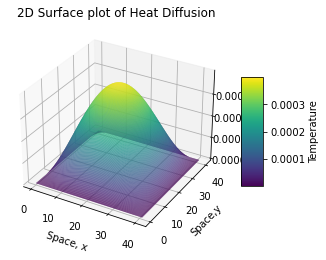

In [16]:
#Defining the program
def heat_FCTS_2D(dt,dx,t_max,x_max,a,T_start,T_end,T0):
   
    
    
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    nt = len(t)
    xn = len(x)
    m =xn/2  
    T = np.zeros((xn,xn))  
    T[int(m),int(m)] = T0 #moved source point outside loop
    for i in range(1, nt-1):
        for j in range(1, xn-1):
            T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
        T[0,0] = T_start
        T[xn-1,xn-1] = T_end
    return(T,x)
f,x = heat_FCTS_2D(0.01,0.2,100,41,1,0,0,20)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X,Y=np.meshgrid(x,x)
heat=ax.plot_surface(X, Y, f,cmap='viridis',rstride=1,cstride=1)
fig.colorbar(heat, shrink=0.5, aspect=5, label='Temperature')
ax.set_xlabel("Space, x")
ax.set_ylabel("Space,y")
ax.set_title("2D Surface plot of Heat Diffusion")
plt.show()

# Stability Criterion for Explicit Schemes
Stability criterion for the 2D model follows,
                 $$a{\Delta t}(\frac{1}{\Delta x^{2}}+\frac{1}{\Delta y^{2}}) =C $$
Playing around with the initial conditions suggests that if we increase t after a certain value, suppose dt=0.012.
the solver becomes incapable of plotting the solution and if we keep increasing dt it is clear that the solution will become divergent and thus unstable.
If want to analyse greater detail in space, which means that dx and dy has to be very small. Huge number of steps will be required leading thr program to become unstable.

In [17]:
#Defining the program
def heat_FCTS_2D(dt,dx,t_max,x_max,a,T_start,T_end,T0):
   
    
    
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    nt = len(t)
    xn = len(x)
    m =xn/2  
    T = np.zeros((xn,xn))  
    
    for i in range(1, nt-1):
        for j in range(1, xn-1):
            T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
        T[0,0] = T_start
        T[xn-1,xn-1] = T_end
        T[int(m),int(m)] = T0 
    return(T,x)


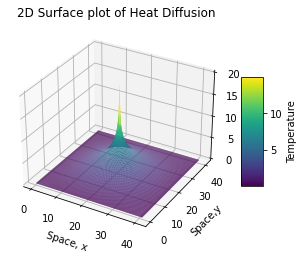

<ipython-input-17-4e0b38e38cff>:15: RuntimeWarning: overflow encountered in multiply
  T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
<ipython-input-17-4e0b38e38cff>:15: RuntimeWarning: overflow encountered in add
  T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
<ipython-input-17-4e0b38e38cff>:15: RuntimeWarning: invalid value encountered in add
  T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
<ipython-input-17-4e0b38e38cff>:15: RuntimeWarning: invalid value encountered in subtract
  T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
<ipython-input-18-8f7e7574ac5e>:16: UserWarning: Z contains 

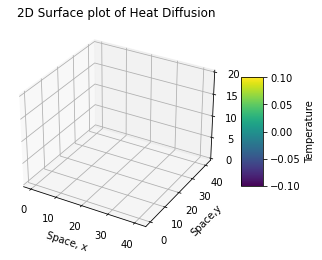

In [18]:
# increase dx, dy and a     # a = thernal diffusivity
f,x = heat_FCTS_2D(0.01,0.3,100,41,3,0,0,20)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X,Y=np.meshgrid(x,x) 
heat=ax.plot_surface(X, Y, f,cmap='viridis',rstride=1,cstride=1)
fig.colorbar(heat, shrink=0.5, aspect=5, label='Temperature')
ax.set_xlabel("Space, x")
ax.set_ylabel("Space,y")
ax.set_title("2D Surface plot of Heat Diffusion")
plt.show()

# increase dx ,dy, a and dt
f,x = heat_FCTS_2D(0.1,0.3,100,41,3,0,0,20)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X,Y=np.meshgrid(x,x)
heat=ax.plot_surface(X, Y, f,cmap='viridis',rstride=1,cstride=1)
fig.colorbar(heat, shrink=0.5, aspect=5, label='Temperature')
ax.set_xlabel("Space, x")
ax.set_ylabel("Space,y")
ax.set_title("2D Surface plot of Heat Diffusion")
plt.show()

If looked carefully at the fisrt plot, we acn see that temperature is growing sloowly.
first plot - dx increased and a increased

The second plot blows off as we have changed dt.
secondplot - dx increased ,a increased and dt increaesed

So i would say cahnging dt was the major reason for the scheme to become unstable.

# Modify to add boundaries

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def heat_FCTS_2D_mod(dt,dx,t_max,x_max,a,T_start,T_end,T0):
    """Function calculates Forward Time Centered Scheme to solve Partial Differential Equation 
    of Heat Diffusion of a system in space, x and y. The system has intial and boundary conditions. 
    
    Args:
        dt: time step
        dx: space step
        t_max: length of time fo which we will observe the system
        x_max: length of suppose a rod in which we will observe the heat flow
        T_0 = initial condition
        T_start: the initial boundary condition at the start
        T_end: the final boundary condtion at the end
        a: is thermal diffusivity
    Returns:
        f: Distribution function being solved as a function of time
        x: The position grid (for information)
        t: The time grid (for information)
    """
    x = np.arange(0,x_max+dx,dx) 
    t = np.arange(0,t_max+dt,dt)
    nt = len(t)
    xn = len(x)
    T = np.zeros((xn,xn))
    T[1:xn-1,1:xn-1] = T0     
    
    
    for i in range(1, nt-1):
        for j in range(1, xn-1):
            T[j,1:xn-1] = T[j,1:xn-1]+ ((a*dt)/dx**2)*(T[j,2:xn] - 2*T[j,1:xn-1] + T[j,0:xn-2])+ ((a*dt)/dx**2)*(T[j+1,1:xn-1] - 2*T[j,1:xn-1] + T[j-1,1:xn-1])
        #If the system is imagined as a 2D box, there are four sides, top,bottom,left, right    
        
        T[(xn-1):, :] = T_end  #assume left side, same temp T[(xn-1):, :] = T[:, :1] = T_end
        T[:, :1] = T_end   #assume right side
        T[:1, 1:] = T_start #assume bottom, same temp  T[:1, 1:] = T[:, (xn-1):]
        T[:, (xn-1):] = T_start  #assume top
        
          
        
    return(T,x)

In [20]:
#temp at boundaries is 20
#temp initially is 0
f,x = heat_FCTS_2D_mod(0.01,0.2,100,41,1,20,20,0) 
                      #dt,dx,t_max,x_max,a,T_start,T_end,T0

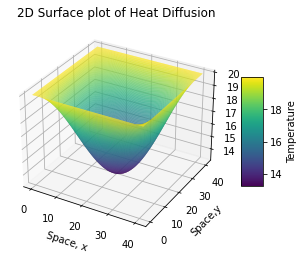

In [21]:
#Plotting using matplotlib's documentation
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X,Y=np.meshgrid(x,x)
heat=ax.plot_surface(X, Y, f,cmap='viridis',rstride=1,cstride=1)
fig.colorbar(heat, shrink=0.5, aspect=5, label='Temperature')
ax.set_xlabel("Space, x")
ax.set_ylabel("Space,y")
ax.set_title("2D Surface plot of Heat Diffusion")
plt.show()

We can see that temperature spreads out over time! Given that the heat source is 2D and on every side,  we can visually see that heat flows to match the temperature of the source. We see temperature of system tending towards 20. 